### Aufgabe 2

Wir gehen vor wie bei Aufgabe 1, nur dass wir diesmal zwei Clusterlisten verwalten. clusterList_col enthält die Farbwerte der geclusterten Punkte mit denen der EM-Algorithmus clustert und parallel dazu wird clusterList_pos angelegt, wo die entsprechenden Koordinaten der geclusterten Punkte zur Rekonstruktion des Bildes gespeichert werden.
Da die Implementierung sehr langsam läuft, versuchen wir pro Ausführung nur 3 mal die Cluster neu zu ermitteln und nehmen auch nur den besten von 3 Versuchen.

In [21]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

img = mpimg.imread("res/nature_small.png")

def show_img(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.show()
    
def mahalanobisDistanz(x, mu, sigma):
    return np.matrix(x-mu) @ np.linalg.pinv(sigma) @ np.transpose(np.matrix(x-mu))

def MittelPunktVector(VecList):    
    n = len(VecList)    
    M =  np.sum(VecList, axis=0)
    M = M / (n) 
    return M

def getKovarianzMatrix(Data, M):  
    n = len(Data)    
    x = np.matrix(Data[0])
    X = np.transpose((x - M)) @ (x - M)   
    for i in range(1,n):        
        x = np.matrix(Data[i])
        tmpX = np.transpose((x - M)) @ (x - M)        
        X = X + tmpX        

    return (X / n)

In [22]:
def em_clustering(img, clusters, attemps):
    
    sizeX = img.shape[0]
    sizeY = img.shape[1]
    
    sigmaList = []
    muList = []    
    clusterList_col = []
    clusterList_pos = []
    
    
    for i in range(0,clusters):
        sigma = np.identity(3)
        mu = np.array(img[np.random.randint(0, sizeX)][np.random.randint(0, sizeX)])        
        sigmaList.append(sigma)
        muList.append(mu)   
    
    for i in range(0,attemps):
        
        clusterList_col = [[] for x in range(clusters)]
        clusterList_pos = [[] for x in range(clusters)]
               
        for x in range(0,sizeX):
            for y in range(0,sizeY):
                
                distList = []

                for k in range(0, clusters):                
                    distList.append(mahalanobisDistanz(img[x][y], muList[k], sigmaList[k]))

                targetCluster = 0
                minDist = distList[0]

                for l in range(1, len(distList)):
                    if(minDist > distList[l]):
                        minDist = distList[l]
                        targetCluster = l

                clusterList_col[targetCluster].append(img[x][y])            
                clusterList_pos[targetCluster].append(np.array([x,y]))
                
        for m in range(0,clusters):
            if(len(clusterList_col[m]) > 0):
                muList[m] = MittelPunktVector(clusterList_col[m])    
                sigmaList[m] = getKovarianzMatrix(clusterList_col[m], muList[m])

    quality = 0
    for sigma in sigmaList:
        quality += np.linalg.det(sigma)
    
    #print(quality)    
    return (quality, clusterList_pos, muList)

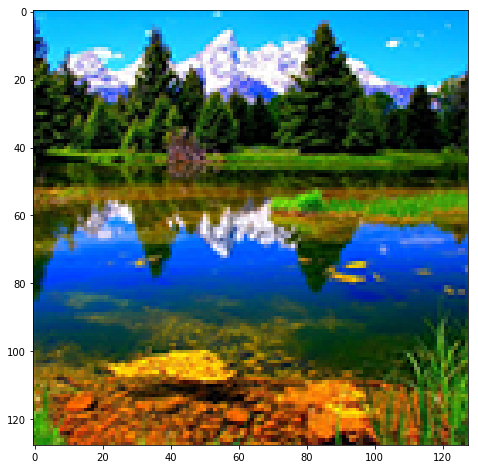

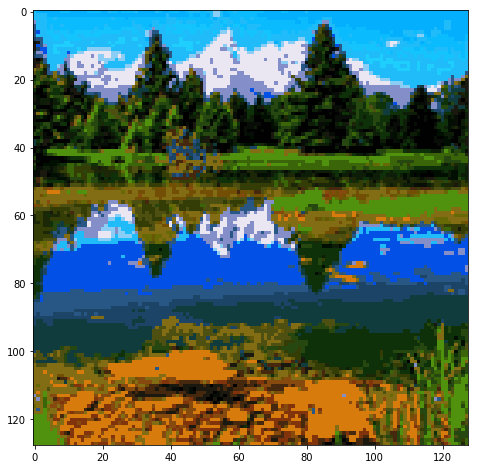

In [23]:
def exec_clustering(img, colors):
    
    ret_img = np.empty(img.shape)
    
    quality, clusterList, muList = em_clustering(img, 32, 3)

    for i in range(0,3):        
        tmp_quality, tmp_clusterList, tmp_muList =  em_clustering(img, 32, 3)
        if(quality > tmp_quality):        
            quality, clusterList, muList = tmp_quality, tmp_clusterList, tmp_muList
            
    for i in range(0,32):
        for j in range(0,len(clusterList[i])):
            x = clusterList[i][j][0]
            y = clusterList[i][j][1]
            ret_img[x,y] = muList[i]

    return ret_img
    
show_img(img)

new_img = exec_clustering(img, 32)

show_img(new_img)